17


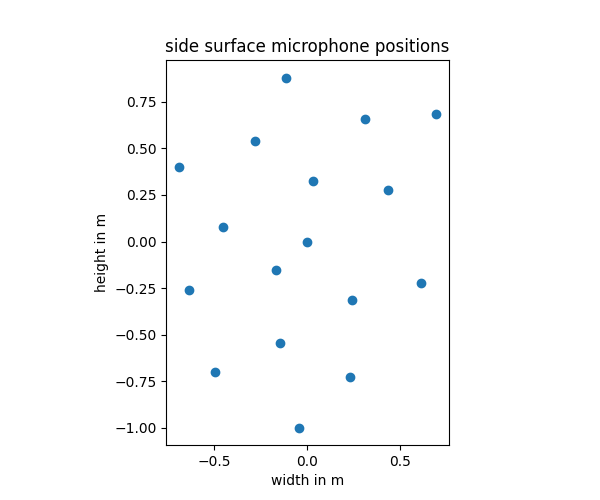

In [12]:
## Seitenflächen
import numpy as np
import matplotlib.pyplot as plt

M = 19.05
m = np.arange(M)
V = 5
R = 1

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut_side = np.array([x[(x >= -0.7) & (x <= 0.7)],y[(x >= -0.7) & (x <= 0.7)]])

len_side = len(coord_cut_side[1])
print(len_side)

fig = plt.figure(figsize=[6,5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_side[0],coord_cut_side[1])
ax.set_title('side surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('height in m')
ax.set_aspect('equal')

13


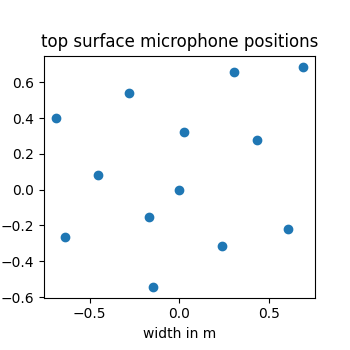

In [13]:
M = 19
m = np.arange(M)
V = 5
R = 1

r = R*np.sqrt(m/M)
phi = 2*np.pi*m*((1+np.sqrt(V))/2)

x = np.asarray(r*np.cos(phi))
y = np.asarray(r*np.sin(phi))
coord = np.array([x,y])
coord_cut_top = np.array([x[(x >= -0.7) & (x <= 0.7) & (y >= -0.7) & (y <= 0.7)],y[(x >= -0.7) & (x <= 0.7) & (y >= -0.7) & (y <= 0.7)]])

print(len(coord_cut_top[1]))

fig = plt.figure(figsize=[3.5,3.5])
ax = fig.add_subplot()
pl = ax.scatter(coord_cut_top[0],coord_cut_top[1])
ax.set_title('top surface microphone positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_aspect('equal')

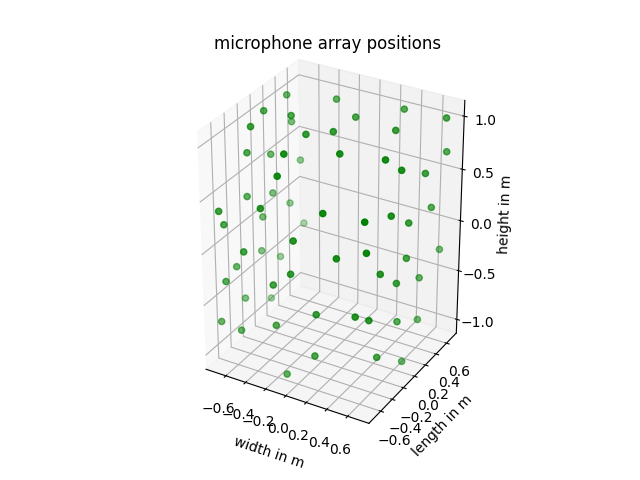

In [14]:
# %matplotlib widget
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

coord_3d_left = np.array([np.ones(len_side)*0.7, coord_cut_side[0], coord_cut_side[1]])
coord_3d_right = np.array([np.ones(len_side)*-0.7, coord_cut_side[0]*-1, coord_cut_side[1]*-1])
coord_3d_front = np.array([coord_cut_side[0], np.ones(len_side)*-0.7, coord_cut_side[1]])
coord_3d_top = np.array([coord_cut_top[0], coord_cut_top[1], np.ones(len(coord_cut_top[0]))])
coord_3d = np.append(coord_3d_front, coord_3d_left, axis = 1)
coord_3d = np.append(coord_3d, coord_3d_right, axis = 1)
coord_3d = np.append(coord_3d, coord_3d_top, axis = 1)

fig = plt.figure(3)#figsize=[8,8])
ax = fig.add_subplot(projection='3d')
pl = ax.scatter(coord_3d[0],coord_3d[1],coord_3d[2], color = 'green')
ax.set_title('microphone array positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_zlabel('height in m')
ax.set_aspect('equal')
plt.show()

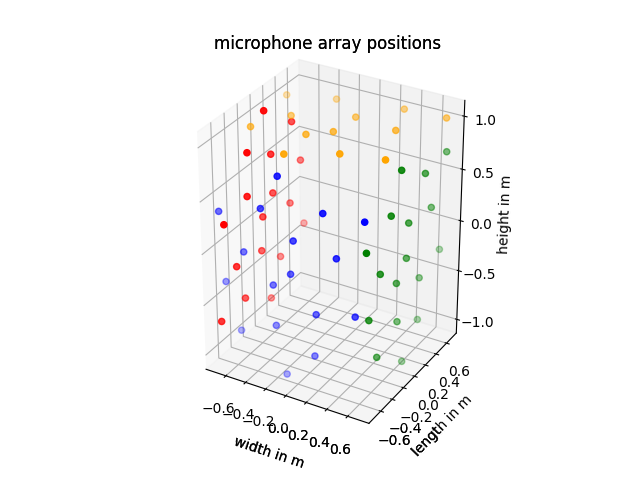

In [15]:
%matplotlib widget
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

coord_3d_left = np.array([np.ones(len_side)*0.7, coord_cut_side[0], coord_cut_side[1]])
coord_3d_right = np.array([np.ones(len_side)*-0.7, coord_cut_side[0]*-1, coord_cut_side[1]*-1])
coord_3d_front = np.array([coord_cut_side[0], np.ones(len_side)*-0.7, coord_cut_side[1]])
coord_3d_top = np.array([coord_cut_top[0], coord_cut_top[1], np.ones(len(coord_cut_top[0]))])

fig = plt.figure(3)
ax = fig.add_subplot(projection='3d')
pl = ax.scatter(coord_3d_left[0],coord_3d_left[1],coord_3d_left[2], color = 'green')
pl = ax.scatter(coord_3d_right[0],coord_3d_right[1],coord_3d_right[2], color = 'red')
pl = ax.scatter(coord_3d_front[0],coord_3d_front[1],coord_3d_front[2], color = 'blue')
pl = ax.scatter(coord_3d_top[0],coord_3d_top[1],coord_3d_top[2], color = 'orange')


ax.set_title('microphone array positions')
ax.set_xlabel('width in m')
ax.set_ylabel('length in m')
ax.set_zlabel('height in m')
ax.set_aspect('equal')
plt.show()

In [16]:
coord_3d = np.round(coord_3d, 3)
headerXML = '''<?xml version="1.0" encoding="utf-8"?>
<MicArray name="bassoon_cage_64">
'''

elements = ""
i = 0
for element in coord_3d.T:
    elements = elements + '  <pos Name="Point %s" x="%s" y="%s" z="%s"/>\n'% (i,coord_3d[0,i],coord_3d[1,i],coord_3d[2,i])
    i = i + 1

footerXML = '''
</MicArray>
'''

XML = (headerXML+elements+footerXML)
outFile = open("bassoon_cage_64.xml","w")
outFile.write(XML)
outFile.close()

# np.savetxt('Array_Geom.csv', coord_3d, delimiter=',')

In [17]:
coord_3d = np.round(coord_3d, 3)
headerXML = '''<?xml version="1.0" encoding="utf-8"?>
<MicArray name="bassoon_cage_64">
'''

elements = ""
i = 0
for element in coord_3d_left.T:
    elements = elements + '  <pos Name="Point %s" x="%s" y="%s" z="%s"/>\n'% (i,coord_3d[0,i],coord_3d[1,i],coord_3d[2,i])
    i = i + 1

footerXML = '''
</MicArray>
'''

XML = (headerXML+elements+footerXML)
outFile = open("bassoon_cage_left_64.xml","w")
outFile.write(XML)
outFile.close()